<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [118]:
# Read CSV
wine = pd.read_csv('winequality_merged.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### 1.2 Explore Data (Exploratory Data Analysis)

In [119]:
# ANSWER
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [120]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


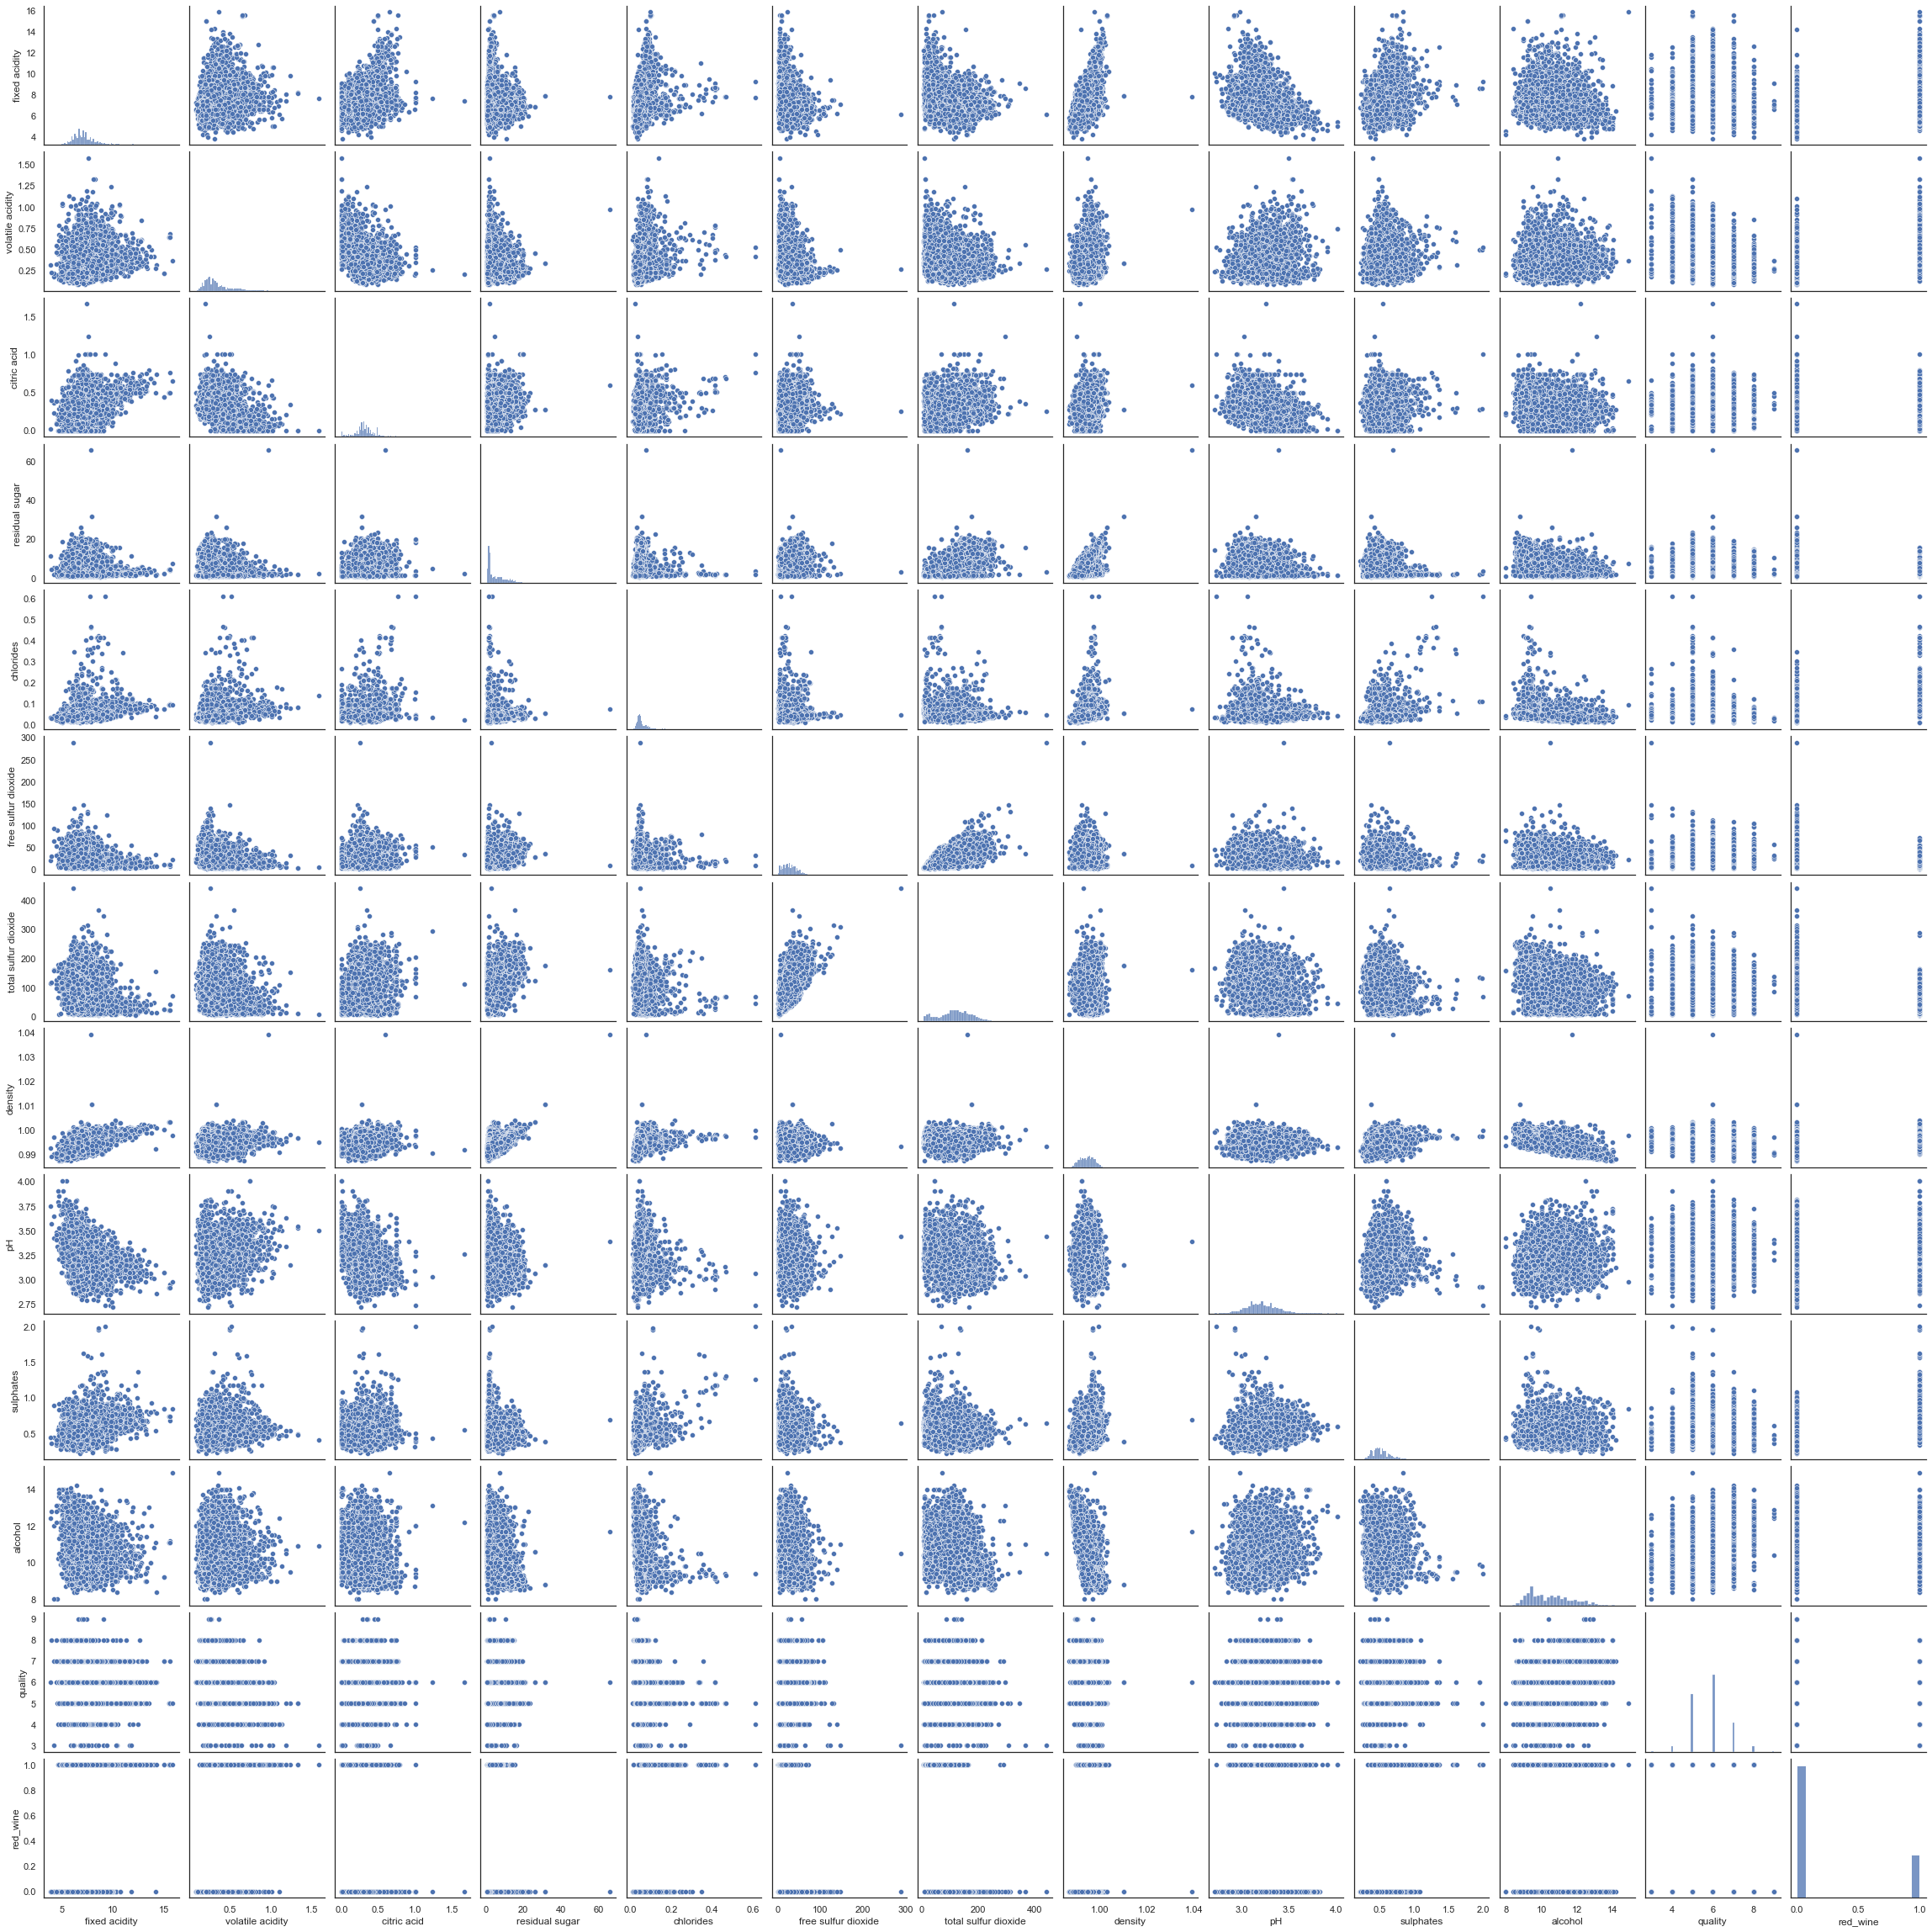

In [121]:
sns.pairplot(wine) #need seaborn library

<AxesSubplot:>

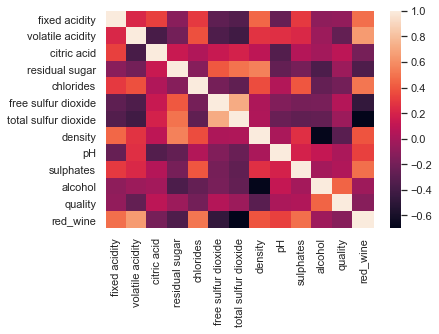

In [122]:
sns.heatmap(wine.corr())

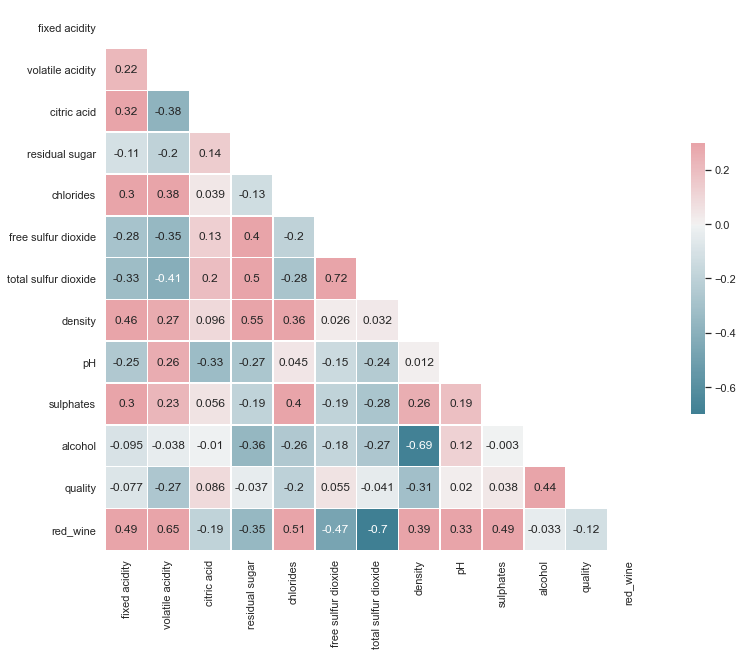

In [123]:
sns.set(style ="white")

mask=np.zeros_like(wine.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up matplotlib figure
f,ax = plt.subplots(figsize=(15,10))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap= True)

#Draw the heatmap with mask and correct aspect ratio
sns.heatmap(wine.corr(),mask = mask, cmap = cmap, vmax =.3, center =0,
            square = True, linewidth = .5, cbar_kws = {"shrink": .5}, annot =True) 

plt.show()


### 2. Set Target Variable

Create a target variable for wine quality.

In [124]:
# Target Variable
y = wine['alcohol']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [125]:
# ANSWER
# Predictor
X = wine['quality'].values.reshape(-1,1) # pls rmb that we have to change the array to be 2 dimensional and not just a single array.it reshapes the columns/panda series to a 2d dataframe. the -1 is to telll the function to infer the value. 1 is the width of the rows 




### 4. Using Linear Regression Create a Model and Test Score

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [127]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [128]:
# Create a model for Linear Regression

lr = LinearRegression(n_jobs=1)

# Fit the model with the Training data

lr.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
from sklearn.metrics import r2_score
training_r_square = lr.score(X_train,y_train)
training_r_square

# Calculate the score (R^2 for Regression) for Testing Data
testing_r_square = lr.score(X_test,y_test)
testing_r_square

0.18198538604750814

### BONUS: Cross validation

In [129]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [130]:
#Kfold

#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [134]:
# Set up 5-fold cross validation  
import pandas as pd
k_fold = KFold(5, shuffle=True) #so there are 4 folds for training set and 1 fold for test set
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    
    # Get training and test sets for X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    
    
    # Fit model with training set

    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    
# Predictions with test set

    y_pred_test_data = lr.predict(X_test)
    

    # Score R2 and RMSE on training and test sets and store in list

# R2     
    r_sq_test = lr.score(X_test,y_test)  
    test_scores.append(r_sq_test)
    r_sq_train =lr.score(X_train,y_train)
    train_scores.append(r_sq_train)

# MSE

    MSE_test = mean_squared_error(X_test,y_test)
    test_rmse.append(MSE_test)

    MSE_train = mean_squared_error(X_train,y_train)
    train_rmse.append(MSE_train)

# Create a metrics_df dataframe to display r2 and rmse scores
 
    combined = {'r-square': [train_scores, test_scores], 'mse': [train_rmse, test_rmse]}

metrics_df= pd.DataFrame(combined, index = ['training data','test data'])  
metrics_df

,r-square,mse
training data,"[0.2010954957799631, 0.2010954957799631, 0.201...","[23.05136402839211, 23.05136402839211, 23.0513..."
test data,"[0.18198538604750814, 0.18198538604750814, 0.1...","[23.29579709401672, 23.29579709401672, 23.2957..."


In [132]:
# Describe the metrics

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



